

*   Machine learning
*   Problem - Regression
*   Model - Linear Regression(Multivarient) from scratch

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/multivariate_housing_prices_in_portlans_oregon.csv')

df.head()

,size(in square feet),number of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
X = df.values[:, 0:2]  # get input values from first two columns
y = df.values[:, 2]  # get output values from last coulmn
m = len(y) # Number of training examples

print('Total no of training examples (m) = %s \n' %(m))

Total no of training examples (m) = 47 



In [4]:
X.shape, y.shape

((47, 2), (47,))

In [9]:
def feature_normalize(X):
  mu = np.mean(X, axis = 0)  
  sigma = np.std(X, axis= 0, ddof = 1)
  X_norm = (X - mu)/sigma
  return X_norm

In [10]:
X = feature_normalize(X)

In [11]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)
X = np.hstack((np.ones((m,1)), X))
X.shape

(47, 3)

**Multiverient Linear Regression - Straight Line equation**

y = theta0 + theta1 * X + theta2 * X

We need to find best value of theta0, theta1 and theta2. 
For that we use optimizer - Gradient descent.

In [12]:
def gradient_descent(X, y, theta, lr, iterations):
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta) 

    # Find error
    errors = np.subtract(predictions, y)

    # Calculate cost - MSE cost function
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    cost_history[i] = J

    # Gradient Descent
    sum_delta = (lr / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;

  return theta, cost_history

In [13]:
# We need theta parameter for every input variable. since we have three input variable including X_0 (column of ones)
theta = np.zeros(X.shape[1])
iterations = 1500;
lr = 0.01;

theta, cost_history = gradient_descent(X, y, theta, lr, iterations)
print('Final value of theta =', theta)

Final value of theta = [340412.56301439 110540.56654627  -6558.99054811]


Text(0.5, 1.0, 'Convergence of gradient descent')

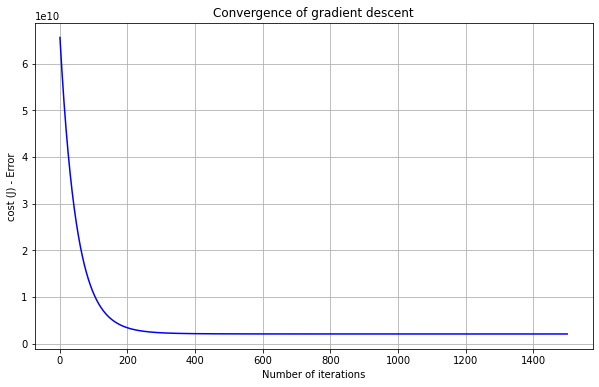

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J) - Error")
plt.title("Convergence of gradient descent")

references - https://satishgunjal.com/multivariate_lr/